In [2]:
from sklearn.datasets import make_gaussian_quantiles,make_classification
import pandas as pd
import numpy as np
import seaborn as sns
import ipyvolume as ipv
import plotly.graph_objs as go
from sklearn.datasets.samples_generator import make_blobs 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import ipyvolume.pylab as plt3d
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def visual3D(X, y, title='Data in 3D', algorithm='tnse'):
    
    from sklearn.manifold import TSNE
    from sklearn.decomposition import PCA
    
    if algorithm=="tsne":
        reducer = TSNE(n_components=3,random_state=47,n_iter=400,angle=0.6)
    elif algorithm=="pca":
        reducer = PCA(n_components=3,random_state=47)
    else:
        raise ValueError("Unsupported dimensionality reduction algorithm given.")
    
    if X.shape[1]>3:
        X = reducer.fit_transform(X)
    else:
        if type(X)==pd.DataFrame:
            X=X.values
        
    marker_shapes = ["circle","diamond", "circle-open", "square",  "diamond-open", "cross","square-open",]
    traces = []
    for hue in np.unique(y):
        X1 = X[y==hue]

        trace = go.Scatter3d(
            x=X1[:,0],
            y=X1[:,1],
            z=X1[:,2],
            mode='markers',
            name = str(hue),
            marker=dict(
                size=12,
                symbol=marker_shapes.pop(),
                line=dict(
                    width=int(np.random.randint(3,10)/10)
                ),
                opacity=int(np.random.randint(6,10)/10)
            )
        )
        traces.append(trace)


    layout = go.Layout(
        title=title,
        scene=dict(
            xaxis=dict(
                title='Dim 1'),
            yaxis=dict(
                title='Dim 2'),
            zaxis=dict(
                title='Dim 3'), ),
        margin=dict(
            l=0,
            r=0,
            b=0,
            t=0
        )
    )
    fig = go.Figure(data=traces, layout=layout)
    iplot(fig)
    
def visual2D(X, y, title='Data in 2D', algorithm='tnse',figsize=(8,8)):
    
    from sklearn.manifold import TSNE
    from sklearn.decomposition import PCA
    
    if algorithm=="tsne":
        reducer = TSNE(n_components=2,random_state=47,n_iter=400,angle=0.6)
    elif algorithm=="pca":
        reducer = PCA(n_components=2,random_state=47)
    else:
        raise ValueError("Unsupported dimensionality reduction algorithm given.")
    
    if X.shape[1]>2:
        X = reducer.fit_transform(X)
    else:
        if type(X)==pd.DataFrame:
            X=X.values
        
    f, (ax1) = plt.subplots(nrows=1, ncols=1,figsize=figsize)
    sns.scatterplot(X[:,0],X[:,1],hue=y,ax=ax1);
    ax1.set_title(title);
    plt.show();

In [51]:
# Features = 2, Classes = 2 (0 and 1)
X1, y1 = make_gaussian_quantiles(cov=3.,n_samples=10000,n_classes=2,n_features=2,random_state=1)
#data = np.concatenate((x,y,y1),axis=1)
y1 = pd.DataFrame(y1,columns=['label'])
y1.index = np.arange(0, len(y1))
y1.index.name = 'index'
syn_df = pd.DataFrame(X1,columns=['col1','col2'])
syn_df.index = np.arange(0, len(syn_df))
syn_df.index.name = 'index'
syn_df = syn_df.merge(y1,on='index')
#syn_df = syn_df.values
#y1 = y1.values

In [52]:
y1.values[:,0]

array([0, 1, 1, ..., 0, 1, 0])

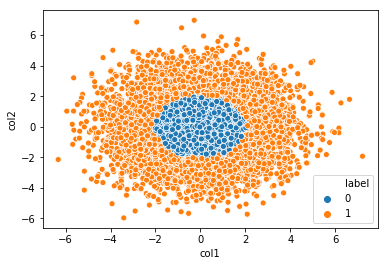

In [54]:
sns.scatterplot(syn_df.loc[:,'col1'],syn_df.iloc[:,1], hue = y1.iloc[:,0])

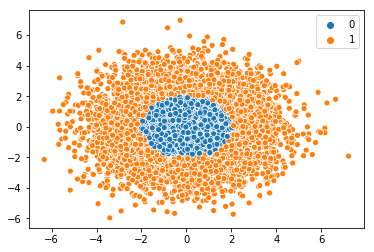

In [49]:
sns.scatterplot(syn_df[:,0],syn_df[:,1], hue = y1)

In [46]:
# Features = 2, Classes = 3 (0, 1 and 2)
X1, y1 = make_gaussian_quantiles(cov=3.,n_samples=10000,n_classes=3,n_features=2,random_state=1)

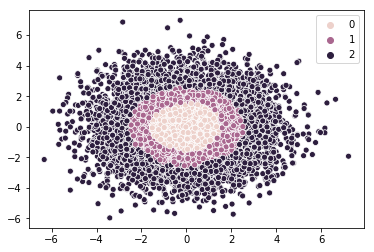

In [47]:
sns.scatterplot(X1[:,0],X1[:,1], hue = y1)

In [6]:
# Features = 3, Classes = 3 (0, 1 and 2)
X1, y1 = make_gaussian_quantiles(cov=3.,n_samples=10000,n_classes=2,n_features=3,random_state=1)

In [28]:
visual(X1,y1)

In [27]:
#x, y, z = X1.T

In [34]:
X1, y1 = make_gaussian_quantiles(cov=3.,n_samples=10000,n_classes=2,n_features=2,random_state=1)
X2, y2 = make_gaussian_quantiles(mean=(4,4),cov=1.,n_samples=5000,n_classes=2,n_features=2,random_state=1)
X = np.concatenate((X1,X2))
y = np.concatenate((y1, -y2+1)) # Colors inverted
print(X1.shape)
print(X2.shape)
print(X.shape)

(10000, 2)
(5000, 2)
(15000, 2)


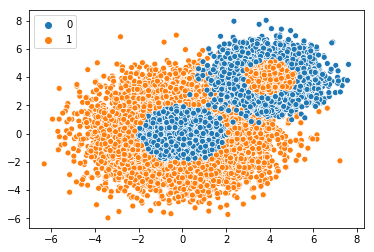

In [35]:
sns.scatterplot(X[:,0],X[:,1], hue = y)

In [3]:
# Features = 3, Classes = 4 (0, 1, 2 and 3)
# Linear Decision Boundaries
# Adding noise(y flip) and imbalance and redudant features
# Multiple clusters of your classes 
# Decrease the separation between classes to force complex non-linear boundary for classifier.
X, y = make_classification(n_samples=10000, n_features=3, n_informative=3, 
                           n_redundant=0, n_repeated=0, n_classes=3, n_clusters_per_class=2,
                           class_sep=5,
                           flip_y=0,weights=[0.5,0.5,0.5])

# flip_y for noise (more the value, more the noise)

In [6]:
MAUC(X,3)

NameError: name 'itertools' is not defined

In [9]:
visual3D(X,y,algorithm='pca')

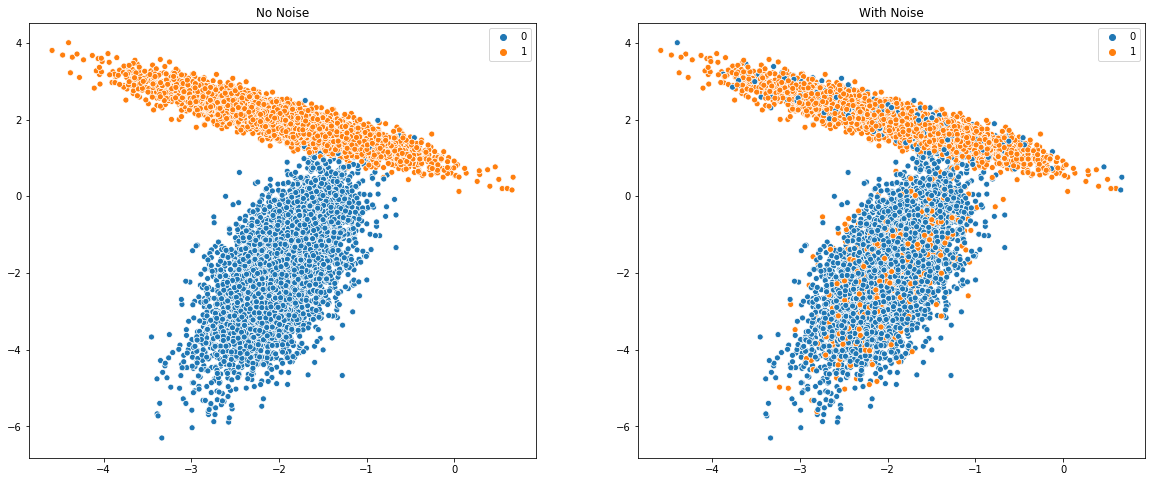

In [39]:
X,y = make_classification(n_samples=10000, n_features=2, n_informative=2,n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1,class_sep=2,flip_y=0,weights=[0.5,0.5], random_state=17)
f, (ax1,ax2) = plt.subplots(nrows=1, ncols=2,figsize=(20,8))
sns.scatterplot(X[:,0],X[:,1],hue=y,ax=ax1);
ax1.set_title("No Noise");
# Generate noisy Data
X,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1,class_sep=2,flip_y=0.2,weights=[0.5,0.5], random_state=17)
sns.scatterplot(X[:,0],X[:,1],hue=y,ax=ax2);
ax2.set_title("With Noise");
plt.show();

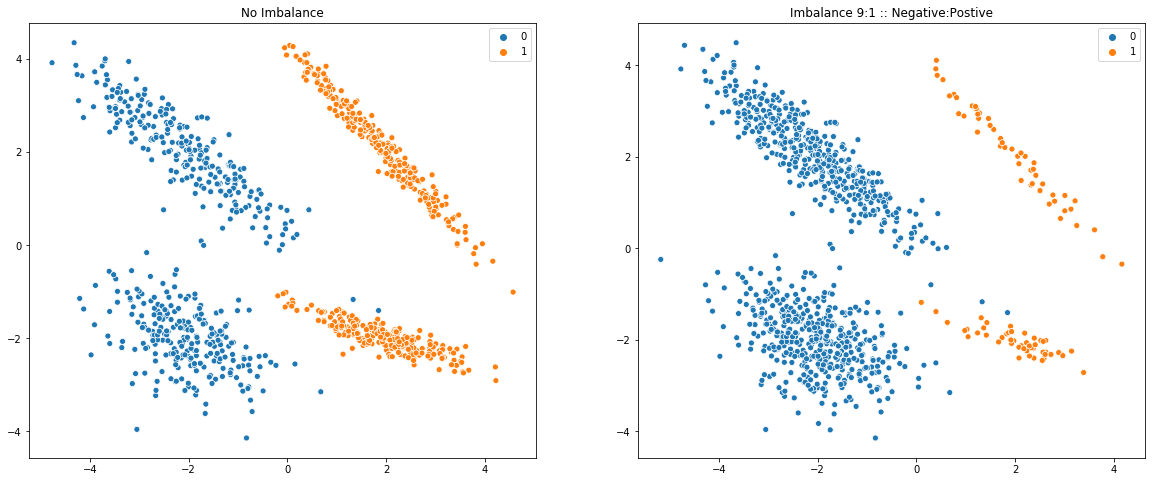

In [40]:
# Imbalanced data : weights = []
X,y = make_classification(n_samples=1000, n_features=2, n_informative=2,n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2,class_sep=2,flip_y=0,weights=[0.5,0.5], random_state=17)
f, (ax1,ax2) = plt.subplots(nrows=1, ncols=2,figsize=(20,8))
sns.scatterplot(X[:,0],X[:,1],hue=y,ax=ax1);
ax1.set_title("No Imbalance");
# Generate Imbalanced Data
X,y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2,class_sep=2,flip_y=0,weights=[0.9,0.1], random_state=17)
sns.scatterplot(X[:,0],X[:,1],hue=y,ax=ax2);
ax2.set_title("Imbalance 9:1 :: Negative:Postive");
plt.show();

In [44]:
# n_features=3, n_informative=2,n_redundant=1 ----> 1 redundant feature + 2 important features
X,y = make_classification(n_samples=10000, n_features=3, n_informative=3, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2,class_sep=2,flip_y=0,weights=[0.5,0.5], random_state=17)
visual(X,y,algorithm="pca")
# 2 Useful features and 3rd feature as Linear Combination of first 2
X,y = make_classification(n_samples=10000, n_features=3, n_informative=2, n_redundant=1, n_repeated=0, n_classes=2, n_clusters_per_class=2,class_sep=2,flip_y=0,weights=[0.5,0.5], random_state=17)
visual(X,y,algorithm="pca")
# first graph: datapoints are in a cloud shape
# second graph: datapoints are in a linear shape although in a 3d graph
# Notice how in presence of redundant features, the 2nd graph, appears to be composed of data points that are 
# in a certain 3D plane (Not full 3D space). Contrast this to first graph which has the data points as clouds 
# spread in all 3 dimensions.

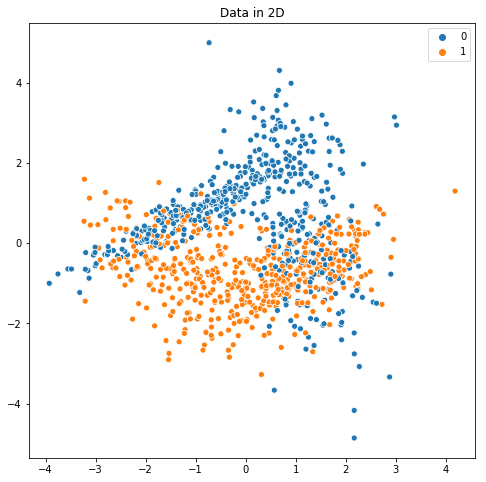

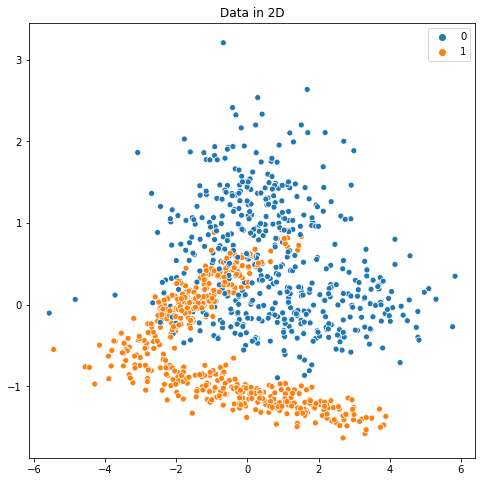

In [51]:
# PLot 2: the data can be seperable even if we plot it in a 2D graph

# 2nd graph cordinates are changed to the 3D plane in which the data points are, 
# then the data will still be separable but its dimension will reduce to 2D, i.e. no information will be lost by 
# reducing the dimensionality of the 2nd graph. But if the dimensionality of the first graph is reduced, the data 
# will not longer remain separable since all 3 features are non-redundant.

X,y = make_classification(n_samples=1000, n_features=3, n_informative=3, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2,class_sep=0.75,flip_y=0,weights=[0.5,0.5], random_state=17)
visual2D(X,y,algorithm="pca")
X,y = make_classification(n_samples=1000, n_features=3, n_informative=2, n_redundant=1, n_repeated=0, n_classes=2, n_clusters_per_class=2,class_sep=0.75,flip_y=0,weights=[0.5,0.5], random_state=17)
visual2D(X,y,algorithm="pca")

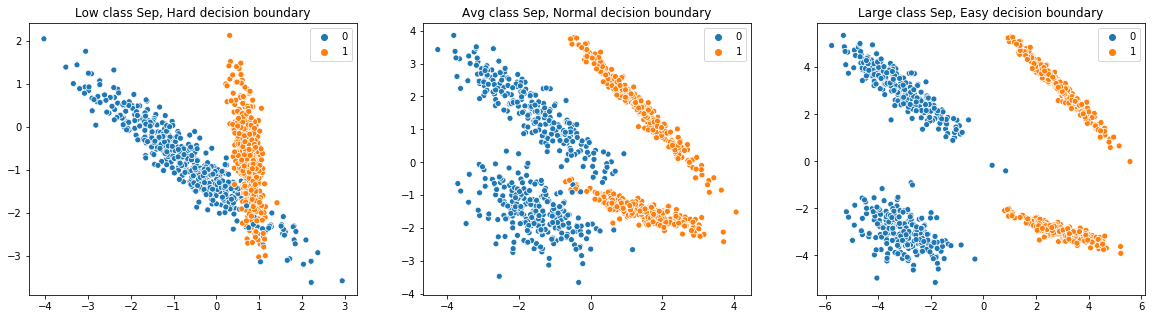

In [58]:
# Changing class separation changes the difficulty of the classification task. 
# The data points no longer remain easily separable in case of lower class separation.
# n_clusters_per_class = 2

# Low class Sep, Hard decision boundary
X,y = make_classification(n_samples=1000, n_features=2, n_informative=2,n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2,
                          class_sep=0.75,flip_y=0,weights=[0.5,0.5], random_state=17)
f, (ax1,ax2, ax3) = plt.subplots(nrows=1, ncols=3,figsize=(20,5))
sns.scatterplot(X[:,0],X[:,1],hue=y,ax=ax1);
ax1.set_title("Low class Sep, Hard decision boundary");
# Avg class Sep, Normal decision boundary
X,y = make_classification(n_samples=1000, n_features=2, n_informative=2,n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2,
                          class_sep=1.5,flip_y=0,weights=[0.5,0.5], random_state=17)
sns.scatterplot(X[:,0],X[:,1],hue=y,ax=ax2);
ax2.set_title("Avg class Sep, Normal decision boundary");
# Large class Sep, Easy decision boundary
X,y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2,
                          class_sep=3,flip_y=0,weights=[0.5,0.5], random_state=17)
sns.scatterplot(X[:,0],X[:,1],hue=y,ax=ax3);
ax3.set_title("Large class Sep, Easy decision boundary");
plt.show();

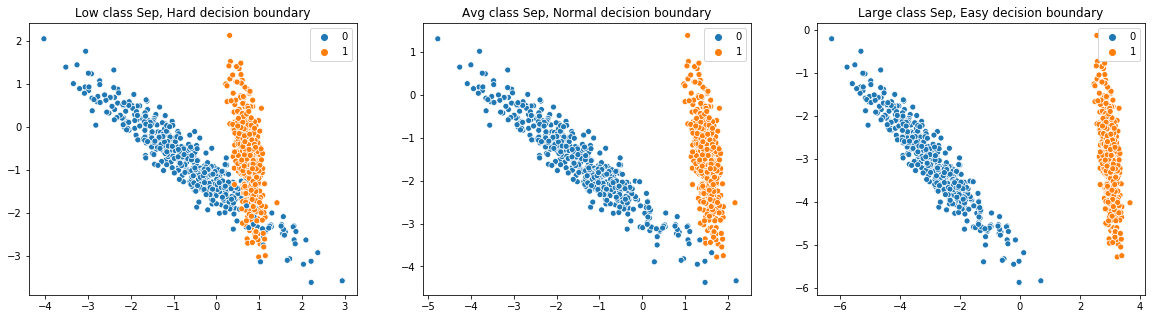

In [59]:
# Changing class separation changes the difficulty of the classification task. 
# The data points no longer remain easily separable in case of lower class separation.
# n_clusters_per_class = 1

# Low class Sep, Hard decision boundary
X,y = make_classification(n_samples=1000, n_features=2, n_informative=2,n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1,
                          class_sep=0.75,flip_y=0,weights=[0.5,0.5], random_state=17)
f, (ax1,ax2, ax3) = plt.subplots(nrows=1, ncols=3,figsize=(20,5))
sns.scatterplot(X[:,0],X[:,1],hue=y,ax=ax1);
ax1.set_title("Low class Sep, Hard decision boundary");
# Avg class Sep, Normal decision boundary
X,y = make_classification(n_samples=1000, n_features=2, n_informative=2,n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1,
                          class_sep=1.5,flip_y=0,weights=[0.5,0.5], random_state=17)
sns.scatterplot(X[:,0],X[:,1],hue=y,ax=ax2);
ax2.set_title("Avg class Sep, Normal decision boundary");
# Large class Sep, Easy decision boundary
X,y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1,
                          class_sep=3,flip_y=0,weights=[0.5,0.5], random_state=17)
sns.scatterplot(X[:,0],X[:,1],hue=y,ax=ax3);
ax3.set_title("Large class Sep, Easy decision boundary");
plt.show();

In [ ]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=100)

In [ ]:
X.shape

In [35]:
y.shape
y

array([0, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0,
       1, 0, 2, 0, 2, 1, 1, 0, 0, 2, 2, 1, 2, 1, 0, 2, 0, 1, 1, 0, 1, 0,
       0, 0, 2, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 2, 0, 0, 1, 0, 0, 0, 0, 2,
       0, 1, 0, 1, 1, 0, 0, 2, 0, 1, 1, 2, 2, 2, 0, 1, 2, 0, 2, 1, 0, 1,
       2, 2, 1, 1, 1, 2, 0, 1, 1, 1, 0, 1])

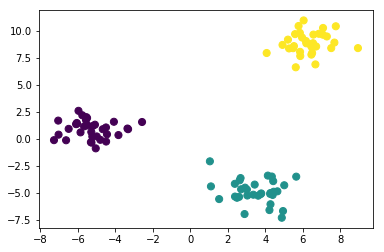

In [36]:
plt.scatter(X[:,0],X[:,1],s=50, c = y) #hue in seaborn

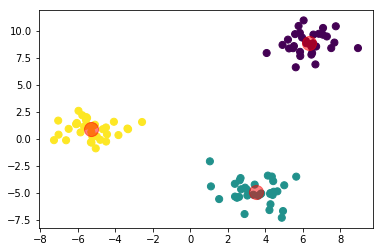

In [39]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3) 
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

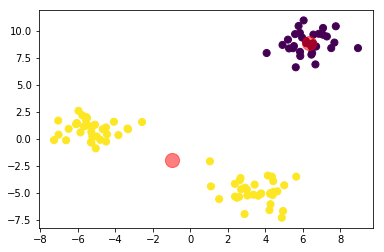

In [40]:
kmeans = KMeans(n_clusters=2) 
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

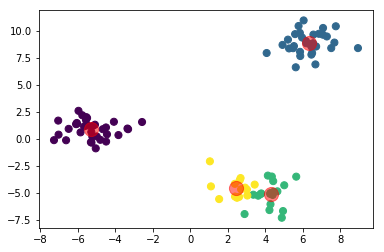

In [41]:
kmeans = KMeans(n_clusters=4) 
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

In [42]:
# from sklearn.svm import SVC

# def plot_linear_svc_regularization():
#     X, y = make_blobs(centers=2, random_state=4, n_samples=30)
#     fig, axes = plt.subplots(1, 3, figsize=(12, 4))

#     # a carefully hand-designed dataset lol
#     y[7] = 0
#     y[27] = 0
#     x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
#     y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

#     for ax, C in zip(axes, [1e-2, 1, 1e2]):
#         ax.scatter(X[:, 0], X[:, 1], s=150, c=np.array(['red', 'blue'])[y])

#         svm = SVC(kernel='linear', C=C, tol=0.00001).fit(X, y)
#         w = svm.coef_[0]
#         a = -w[0] / w[1]
#         xx = np.linspace(6, 13)
#         yy = a * xx - (svm.intercept_[0]) / w[1]
#         ax.plot(xx, yy, label="C = %.e" % C, c='k')
#         ax.set_xlim(x_min, x_max)
#         ax.set_ylim(y_min, y_max)
#         ax.set_xticks(())
#         ax.set_yticks(())
#         ax.set_title("C = %f" % C) 

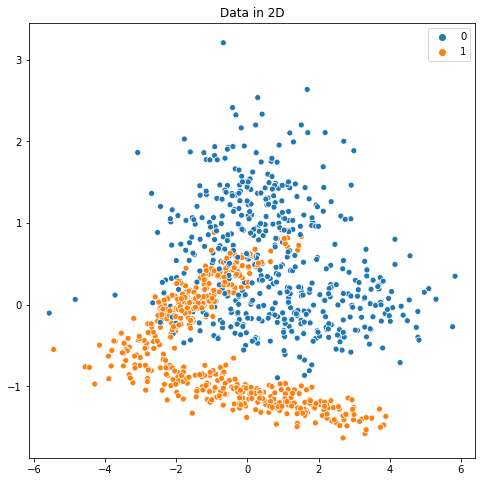

In [4]:
X,y = make_classification(n_samples=1000, n_features=3, n_informative=2, n_redundant=1, n_repeated=0, n_classes=2, n_clusters_per_class=2,class_sep=0.75,flip_y=0,weights=[0.5,0.5], random_state=17)
visual2D(X,y,algorithm="pca")